This file is largely intended to discover the circular (non-neural) molecular fingerprinting and drawing capacities of the RDKit library. Unfortunately, the online documentation is largely lacking.

In [1]:
import sys
print(sys.executable)

/home/sohompaul/psi4conda/envs/rdkit-env/bin/python


In [2]:
import matplotlib
from matplotlib import pyplot as plt

import numpy as np

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

In [4]:
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.backend import mean, square

In [16]:
from spektral.datasets import qm9
from spektral.utils import label_to_one_hot
from spektral.chem import numpy_to_rdkit

In [8]:
A, X, E, y = qm9.load_data(
    return_type='numpy',
    nf_keys='atomic_num',
    ef_keys='type',
    self_loops=True,
    amount=None
)

Loading QM9 dataset.
Reading SDF


C
N
O
C#C
C#N


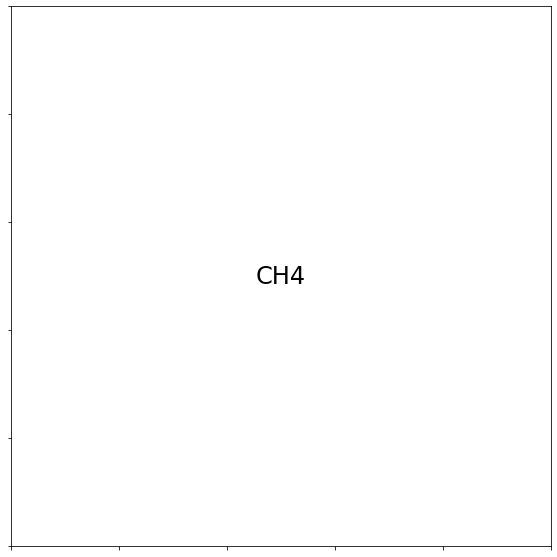

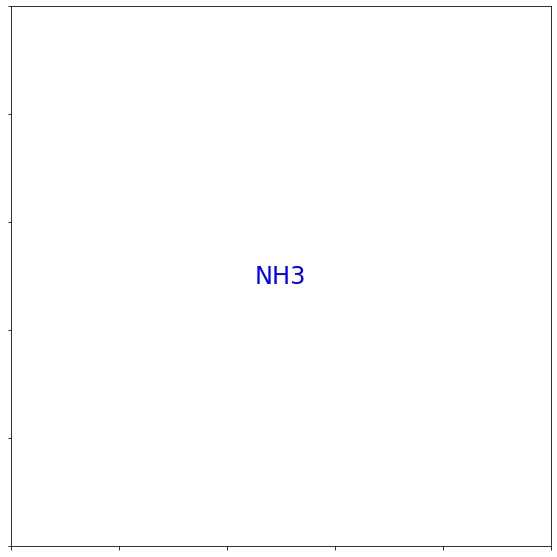

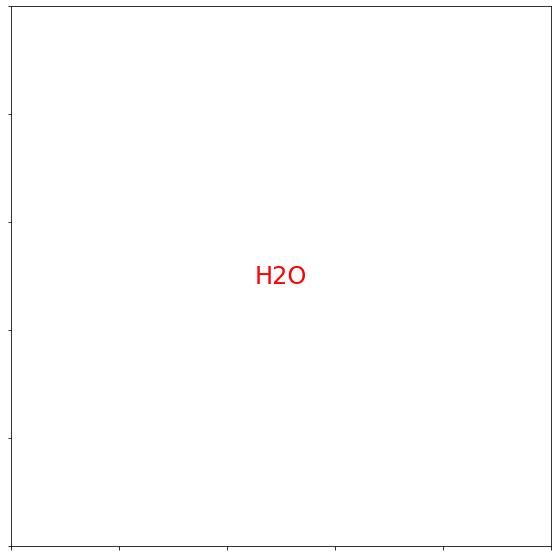

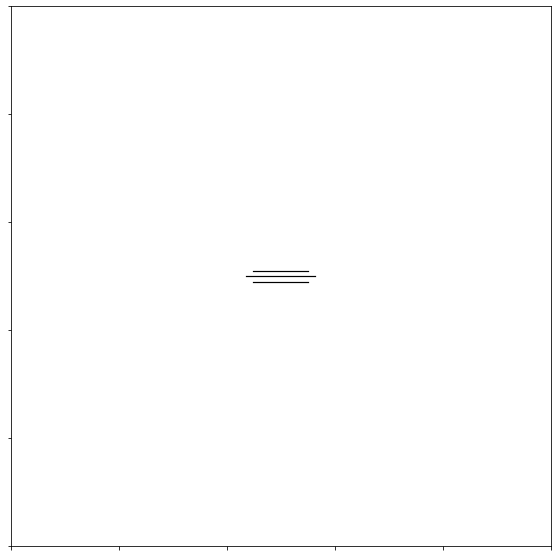

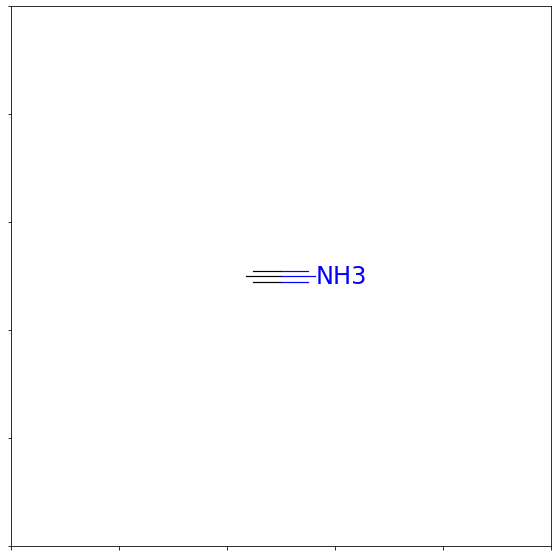

In [19]:
count = 0
for a, x, e in zip(A, X, E):
    if count < 5:
        mol = numpy_to_rdkit(a, x, e)
        Draw.MolToMPL(mol)
        print(Chem.MolToSmiles(mol))
    count += 1

In [12]:
mol = Chem.MolFromSmiles('C(=O)(N)N')

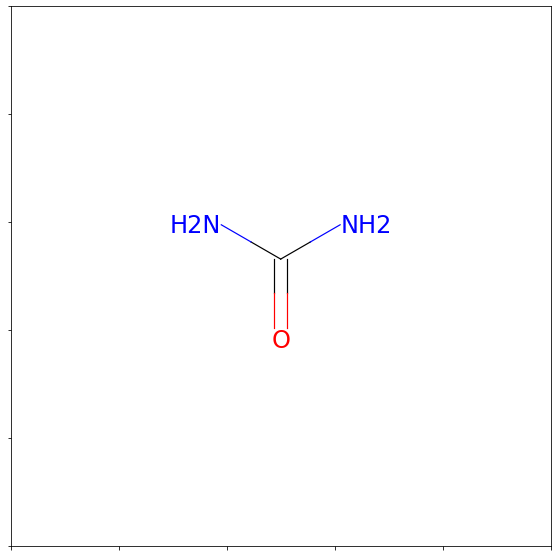

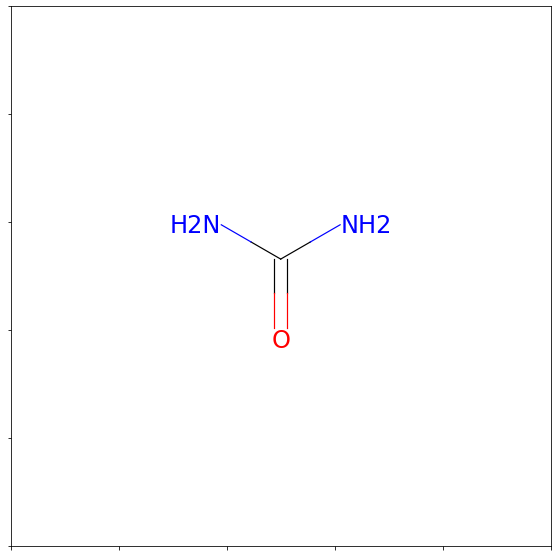

In [25]:
Draw.MolToMPL(mol)

In [28]:
fingerprint = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

In [29]:
fp_array = np.zeros((1, ))
ConvertToNumpyArray(fingerprint, fp_array)

In [30]:
print(fp_array)
print(fp_array.shape)

[0. 0. 0. ... 0. 0. 0.]
(2048,)
